# **SPARK FOUNDATION**

# **Task 1- Prediction using Supervised ML**

Predict the percentage of an student based on the no. of study hours.

## **Author Mohit Lalwani**

LinkedIn = https://www.linkedin.com/in/mohit-lalwani-778a65152/



In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [11]:
#reading data
data = 'http://bit.ly/w-data'
ds = pd.read_csv(data)
ds.head()   #this dispaly first five rows and columns of data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [12]:
ds.tail() # this display last five rows 

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [13]:
#Check if there any null value in the Dataset
ds.isnull == True

False

***There is NO NULL Value in This DataSet So we can do Visulaization Now of data***

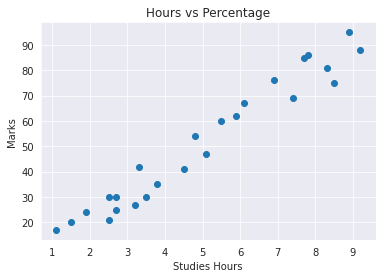

In [14]:
sns.set_style('darkgrid')
plt.scatter(ds['Hours'],ds['Scores'])
plt.title("Hours vs Percentage")
plt.xlabel("Studies Hours")
plt.ylabel("Marks")
plt.grid(True)
plt.show()

**From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.**

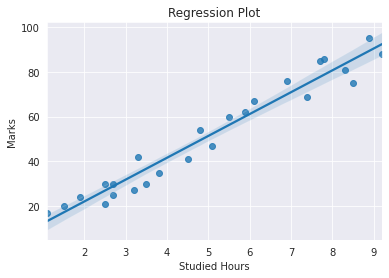

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [18]:
sns.regplot(x= ds['Hours'], y= ds['Scores'])
plt.title('Regression Plot')
plt.ylabel('Marks')
plt.xlabel('Studied Hours')
plt.show()
print(ds.corr())

**It is confirmed that the variables are positively correlated.**

## **Training Model**

### **1) Splitting Data**

In [21]:
X = ds.iloc[:, :-1].values  
y = ds.iloc[:, 1].values
#splitting data 
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### **2) Fitting the Data into the model**

In [22]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


## **Predicting Percentage of Marks**

In [23]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


## **Comparing the Predicted Marks with the Actual Marks**

In [24]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## **Visually Comparing the Predicted Marks with the Actual Marks**

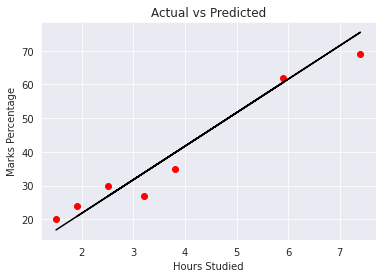

In [29]:
plt.scatter(x=val_X, y=val_y, color='Red')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted')
plt.ylabel('Marks Percentage')
plt.xlabel('Hours Studied')
plt.show()

## **Model Evaluating**

In [26]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


# **What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [27]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


# **According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.**